<a href="https://colab.research.google.com/github/JuanManuelReyes/DS-Coder/blob/main/Proyecto_Final_DS_Coder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final Data Science

## Descripción
`Este proyecto busca aplicar el analisis de datos y distintas tecnicas de aprendizaje supervisado para lograr la deteccion de enfermedades cardiacas utilizando los datos aportados por el Dataset ECG5000`
### Objetivo

> El objetivo de este proyecto es lograr la detección de enfermedades cardiacas o anomalías mediante una onda de un electrocardiograma a través en análisis y manejo de datos aportados por el data set [ECG5000](https://timeseriesclassification.com/description.php?Dataset=ECG5000), y también mediante otras técnicas que nos serán útiles para poder realizar el modelo predictivo. La idea principal de este sistema es que se pueda utilizar para realizar un monitoreo automático sin la necesidad de que un medico cardiólogo este interpretando los datos obtenidos por el electrocardiograma. 
Este sistema podrá ser utilizado en Holter u otro tipo de instrumentos de monitorización cardiaca mediante ondas eléctricas, el resultado obtenido de estas mediciones serán los analizados y se tomará una conclusión de acuerdo al análisis. `

### Procedimiento

Lo primero que se deberá hacer es detectar la presencia o ausencia de irregularidades en el ritmo cardiaco de un paciente a través de las señales del electrocardiograma.

#### Ejemplo:
En la imagen que se muestra a continuación se puede ver las diferencias entre ambos electrocardiogramas.

![enter image description here](https://ch.mathworks.com/de/company/newsletters/articles/teaching-medical-instrumentation-at-the-university-of-washington/_jcr_content/mainParsys/image_2.adapt.full.medium.gif/1469941526368.gif)

Nuestro dataset cuenta con un problema importante, no tenemos la misma cantidad de datos normales (pacientes sanos) y anormales (pacientes enfermos), ya que al estar trabajando con datos obtenidos de estudios del ritmo cardiaco es difícil la obtención de las señales irregulares, ya que las anomalias cardiacas no son constatnes, sino que se dan de forma repentina, la forma de obtener mas datos en los que se presenten anomalias es que se monitoree constantemente, pero no es este caso. 

Debido a este problema no podremos entrenar una red neuronal convencional con estos datos, ya que el resultado sería una predicción errada, la red estará mejor entrenada para aquellos datos que se encuentren en mayor cantidad, en este caso, los datos normales y no los anormales que son los mas importantes, ya que es mejor dar como resultado una predicción errada, en caso de "diagnosticar" una patologia, a que una buena (no hay patologia) y que este paciente en verdad este enfermo, todas las predicciones deberán ser valoradas por un profesional de todos modos.

`Ese motivo nombrado anteriormente nos llevara a utilizar una técnica llamada autoencoders, que la explicaremos posteriormente.`

----------------

El dataset que utilizaremos nos proporciona 7600 datos de entrenamiento (estos datos son porciones de electrocardiograma), y también nos aporta 1900 datos de prueba. 

En base a estos datos, los podremos dividir en 5 categorías:

1. Normal
2. Anormal: Contracción ventricular prematura
3.	Anormal: Contracción supraventricular prematura
4.	Anormal latido ectópico
5.	Anormal, patología desconocida


#### Normalizacion del Dataset
Cada uno de nuestros datos de estudio no es el electrocardiograma completo sino una fracción de el correspondiente a un latido. Este ciclo cardiaco puede variar entre los pacientes de acuerdo a el método de obtención, pero al momento de la conformación de este dataset todos los datos se normalizaron a 140 muestras, es decir, que cada ejemplo de entrenamiento y cada ejemplo de prueba va a tener 140 muestras correspondientes a un ciclo cardiaco perteneciente a una de las categorías anteriormente nombradas.


## Autoencoders

> Como nombramos anteriormente este dataset tiene una cantidad desproporcionada entre los diferentes tipos de datos, tenemos 4427 datos de pacientes normales (sanos) y 3173 datos de pacientes con enfermedades (datos que presentan anomalias), sumando que en estos últimos se subdividen en 4 categorías, y dentro de estas categorías las ultimas 3 tienen una cantidad muy desbalanceada de datos en relación a la primera, esto nos lleva a que en vez de utilizar una simple red neuronal convencional tengamos que utilizar un autoencoder.

Pongamos en un ejemplo grafico que seria un autoencoder, supongamos que tenemos 2 redes neuronales, siendo la segunda el reflejo de la primera.

![enter image description here](https://www.researchgate.net/profile/Hieu-Mac/publication/328760180/figure/fig2/AS:702182101897218@1544424667454/The-general-autoencoder-architecture.png)

#### Explicación
Como entrada, del lado izquierdo (nodos azules), vamos a tener los datos originales, a estos le corresponderían 140 neuronas (basándonos en la normalización anteriormente nombrada), estos datos de entrada pasaran por una primera red neuronal a la cual llamaremos encoder o codificador, este encoder se encargara de obtener una representación reducida de los datos de entrada (como una red neuronal convencional), es decir, como nuestro dato de entrada tiene 140 muestras, el objetivo de esta red neuronal es poder lograr la obtención de ese mismo dato de entrada partiendo de una cantidad menor de datos. Esa representación compacta de nuestros datos será la que se encuentra en el medio de nuestro diagrama (nodos verdes), a la cual llamaremos bottleneck o cuello de botella. La idea de los autoencoder es poder realizar el proceso inverso al enconder del lado derecho del bottleneck, a este proceso lo llamaremos decoder, que esta representado en el diagrama con los nodos anaranjados, este decoder funciona a partir de el dato reducido. 

A diferencia de las redes neuronales convencionales, nuestro dato de salida no es una categoría, sino que el mismo dato de entrada, entonces, ¿Cuál es el fin de todo esto? El fin de todo esto es poder entrenar a nuestro autoencoder con datos normales, que es el de mayor cantidad, obteniendo como resultado al ingreso de un dato normal, una reconstrucción muy acertada del mismo, pero al momento de ingresarle un dato anormal, nos dará una reconstrucción diferente de acuerdo a la clasificación del mismo y de esta forma lo clasificaremos nosotros. 

In [ ]:
#Importamos pandas para obtener los datos de nuestros archivos csv
import pandas as pd

In [ ]:
#Creamos los dataframes de entrenamiento y de prueba.
df_entrenamiento = pd.read_csv('/content/ECG5000_train.csv')
df_prueba = pd.read_csv('/content/ECG5000_test.csv')

#### Shape
Utilizando el método shape podemos ver el tamaño de un dataframe, en este caso el dataframe de entrenamiento tiene 7600 datos y cada uno de ellos se compone por 141 partes, siendo la parte 1 el indicador de la patología, cumpliendo con la normalización de 140 fracciones nombradas anteriormente.

In [ ]:
#Mostramos el shape de nuestros dataframes
print("Tamaño del data frame de entrenamiento: ",df_entrenamiento.shape)
print("Tamaño del data frame de prueba: ",df_prueba.shape)

Tamaño del data frame de entrenamiento:  (7600, 141)
Tamaño del data frame de prueba:  (1900, 141)


### Datos
Aquí podemos ver la composición de cada uno de los datos, como se nombro en el punto anterior podemos ver que la columna 0 corresponde al numero de patología, listadas anteriormente, y los otros 140 datos corresponden a cada uno de las fracciones que representan un latido.

In [ ]:
#Mostramos los 10 primeros elementos de nuestro dataframe de entrenamiento.
df_entrenamiento.head(10)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,-1.30300,-0.83573,-1.93360,-2.09420,-2.02840,-1.2531,-0.52638,-0.089286,-0.07557,...,-1.458200,-1.66760,-1.59770,-1.67930,-1.677200,-1.69370,-1.79410,-1.35940,-2.08120,-2.828800
1,2,0.32288,-0.87847,-1.80230,-2.66850,-3.26550,-3.3326,-2.88000,-2.227400,-1.54360,...,-1.230500,-1.72180,-2.19530,-2.74890,-3.446500,-3.66210,-3.01820,-1.65140,-0.23670,0.828320
2,2,1.39340,1.59260,1.24200,0.79449,0.19577,-0.3156,-0.58053,-0.945020,-1.23350,...,-1.908500,-2.52950,-3.06140,-3.50370,-3.900400,-4.24600,-4.13380,-3.19850,-2.42200,-1.073700
3,1,-3.52270,-5.02610,-4.36130,-4.10570,-3.10420,-1.8178,-1.39840,-1.070100,-0.40691,...,0.830380,1.00840,1.18300,0.94636,0.952130,0.79343,0.84741,1.01390,0.31234,-2.190600
4,1,-1.91820,-3.22510,-3.46520,-4.00800,-3.87030,-3.3581,-2.28540,-1.728500,-1.42220,...,1.776900,1.50290,1.16510,0.46073,0.019172,-0.32739,-0.48051,-0.18814,0.14284,-0.668440
5,1,1.23860,0.71184,-1.56900,-2.91390,-3.85070,-4.1037,-3.01430,-1.953500,-1.58120,...,-0.341820,-0.32094,0.20594,1.12740,0.946090,1.24450,1.29590,0.87969,0.23098,-0.068487
6,1,-2.27190,-2.18570,-1.75710,-3.29430,-4.25080,-4.3600,-4.11950,-3.652500,-3.04950,...,-0.191460,-0.02938,0.45756,0.77509,0.794500,1.01320,0.87331,0.61313,0.78811,1.108800
7,1,2.30400,1.30800,-0.93451,-2.54130,-4.01190,-4.3023,-3.31820,-1.979300,-1.89950,...,0.063561,0.40578,0.99387,1.06980,1.707800,2.27130,2.63320,2.43280,1.52110,2.186600
8,2,-1.01810,-1.54840,-0.96366,-0.70092,-0.96366,-1.0047,-0.74579,-0.699930,-0.90919,...,-1.453900,-1.45300,-1.67180,-1.83860,-1.453900,-0.92934,-1.23600,-2.01730,-1.50830,0.906620
9,1,-0.89225,-3.14410,-4.09330,-4.40880,-4.03770,-3.4966,-2.37850,-1.603900,-1.36380,...,0.763150,0.97548,1.00170,1.30310,1.259800,0.91522,0.68106,0.81774,1.19810,-0.151460


### Patologias
Contamos la cantidad de elementos de cada tipo para saber cuantos datos hay con cada una de las enfermedades o cuantos son normales.
Podemos ver que hay:

	- 4427 datos correspondientes a personas normales.
	- 2683 datos de personas con Contracción ventricular prematura.
	- 306 datos de personas con Contracción supraventricular prematura.
	- 149 datos de personas con latido ectópico
	- Y 35 datos que padecen de una patología desconocida


In [ ]:
#Cantidad de datos por patologia
df_entrenamiento['0'].value_counts()

1    4427
2    2683
4     306
3     149
5      35
Name: 0, dtype: int64

### Sets de Datos
Creamos los sets de datos de prueba y de entrenamiento, al estar trabajando con datos de pandas debemos convertir nuestros datos a arrays de numpy para así poder trabajar con ellos.

In [ ]:
#Pasaje de pandas a numpy
set_entrenamiento = df_entrenamiento.values
set_prueba = df_prueba.values

#Establecemos las categorias (Distintas enfermedades)
cat_entrenamiento = set_entrenamiento[:,0]
cat_prueba = set_prueba[:,0]


### Distribución de datos
En este paso final distribuiremos los distintos datos que tenemos según su categoría.
##### Explicación:
Supongamos este caso `entrenamiento_cat_1 = set_entrenamiento[cat_entrenamiento==1,1:]`, aquí estamos estableciendo en la variable entrenamiento_cat_1, los valores correspondientes al set de datos de entrenamiento que son del tipo 1, o sea, pacientes sanos, para estos le decimos que de nuestro array de datos, obtenga los datos correspondientes a a categoría 1 y nos devuelva de la columna 1 en adelante, es decir nos aportara todas las fracciones del electrocardiograma, y esto lo repetimos para todas las categorías en ambos sets de datos, tanto prueba como entrenamiento.

In [ ]:
#Repartimos los datos en las distintas categorias

#Subdivisión por categorías del set de entrenaiento
entrenamiento_cat_1 = set_entrenamiento[cat_entrenamiento==1,1:]
entrenamiento_cat_2 = set_entrenamiento[cat_entrenamiento==2,1:]
entrenamiento_cat_3 = set_entrenamiento[cat_entrenamiento==3,1:]
entrenamiento_cat_4 = set_entrenamiento[cat_entrenamiento==4,1:]
entrenamiento_cat_5 = set_entrenamiento[cat_entrenamiento==5,1:]

#Subdivisión por categorías del set de prueba
prueba_cat_1 = set_prueba[cat_prueba==1,1:]
prueba_cat_2 = set_prueba[cat_prueba==2,1:]
prueba_cat_3 = set_prueba[cat_prueba==3,1:]
prueba_cat_4 = set_prueba[cat_prueba==4,1:]
prueba_cat_5 = set_prueba[cat_prueba==5,1:]

In [ ]:
#Importamos las librerias que utilizaremos para graficar datos.
import matplotlib.pyplot as plt
import numpy as np

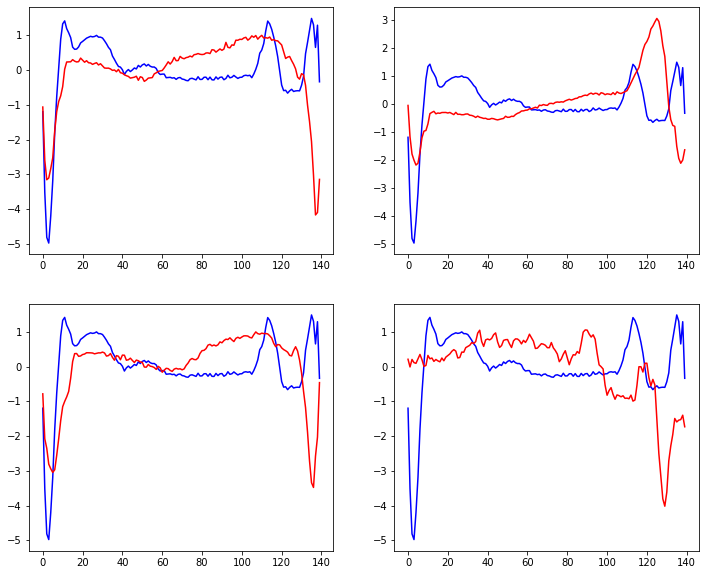

In [ ]:
#Realizamos los graficos comaprativos entre las distintas enfermedades y un dato noramal.

#Seteamos variables para graficar
cat_1 = prueba_cat_1[1]
cat_2 = prueba_cat_2[1]
cat_3 = prueba_cat_3[1]
cat_4 = prueba_cat_4[1]
cat_5 = prueba_cat_5[1]


plt.figure(figsize=(12,10))
plt.grid()

#Grafica ubicada en el cuadrante 1 (superior izquierdo)
plt.subplot(2,2,1)
plt.plot(np.arange(140), cat_1, 'blue')
plt.plot(np.arange(140), cat_2, 'red')

#Grafica ubicada en el cuadrante 2 (superior derecho)
plt.subplot(2,2,2)
plt.plot(np.arange(140), cat_1, 'blue')
plt.plot(np.arange(140), cat_3, 'red')

#Grafica ubicada en el cuadrante 3 (inferior izquierdo)
plt.subplot(2,2,3)
plt.plot(np.arange(140), cat_1, 'blue')
plt.plot(np.arange(140), cat_4, 'red')

#Grafica ubicada en el cuadrante 4 (inferior derecho)
plt.subplot(2,2,4)
plt.plot(np.arange(140), cat_1, 'blue')
plt.plot(np.arange(140), cat_5, 'red')

### Normalización de Datos

Realizamos la normalización de los datos, al momento de trabajar con técnicas de machinelearnign es importante que todos nuestros datos esten normalizados.

El metodo MinMaxScaler calcula el máximo y mínimo de amplitud de cada dato y a cada punto el resta el mínimo, para luego dividirlo entre el máximo menos el mínimo, obteniendo así que todos los datos estén entre 0 y 1.

Para esto utilizaremos el set de entrenamiento y luego el set de prueba lo escalaremos en base a los parámetros calculados con el set de entrenamiento . Esto lo hacemos así porque este set de entrenamiento 1 es el que va a ver el autoencoder, por eso lo tenemos que escalar usando los mismo parámetros.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

entrenamiento_cat_1_normal = min_max_scaler.fit_transform(entrenamiento_cat_1)
print('Mínimo y máximo reale: {:.1f}, {:.1f}'.format(np.min(entrenamiento_cat_1), np.max(entrenamiento_cat_1)))
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(entrenamiento_cat_1_normal), np.max(entrenamiento_cat_1_normal)))

#Luego se normalizaran los otros datos en base a estos.
#Se continuara en futuras entregas.

prueba_cat_1_normal = min_max_scaler.transform(prueba_cat_1)
prueba_cat_2_normal = min_max_scaler.transform(prueba_cat_2)
prueba_cat_3_normal = min_max_scaler.transform(prueba_cat_3)
prueba_cat_4_normal = min_max_scaler.transform(prueba_cat_4)
prueba_cat_5_normal = min_max_scaler.transform(prueba_cat_5)

Mínimo y máximo reale: -7.1, 5.0
Mínimo y máximo normalizado: 0.0, 1.0


## Creacion del Autoencoder

Recordemos lo que anteriormente definimos, nuestro autoencoder debe de tener un enconder del lado izquierdo (que es una red neuronal), un bottleneck o cuello de botella en el centro y un decoder del lado derecho (que también es una red neuronal), resultante del "reflejo" del enconder, es decir, se reconstruirá el dato original.

Mediante la capa o layer input, crearemos un objeto el cual será la entrada de nuestro modelo, y con dense, agregaremos sucesivamente cada una de las capas de este autoencoder

Al momento de entrenar un modelo de deeplearning (como es este caso), deberemos inicializar los parámetros del mismo de forma aleatoria, en este caso controlaremos el generador de esa aleatoriedad fijando la seed en 23 (puede ser cualquier numero).

Establecemos que cada dato de entrada será constituido por 140 muestras y seteamos nuestro objeto de entrada (llamado entrada), de una instancia input de Keras y definimos el tamaño de ese input como el dato obtenido anteriormente.

Este modelo ira cambiando en las futuras entregas, este es el punto de partida para luego perfeccionarlo con el fin de obtener resultados mas acertados.

En nuestra primera fase (encoder), pasaremos de un dato de 140 muestras (nuestra entrada) a un dato de 32 muestras, luego a uno de 16 entradas y finalmente a uno de 8, estos valores (32, 16 y 8 también son las neuronas de nuestra red), esto indica que nuestro bottleneck o cuello de botella de nuestro autoencoder tendrá 8 datos (neuronas) y a partir de ellos haremos la deconstrucción.

Luego en la segunda fase (decoder), pasaremos de nuestro bottleneeck (8 datos) a 16 datos, luego a 32 datos y finalmente volvemos a 140 muestras como el dato original de entrada.

La estructura de estos objetos es, declaramos el objeto en este caso llamado encoder, al cual le pasaremos nuestro objeto entrada, pero luego "sobrescribiremos" ese dato enconder con una versión mas reducida del anterior valor de el mismo, para finalmente obtener el decoder.

En este caso las funciones de activación son relu, ya que siempre que tenemos capas ocultas se sugiere utilizar esta función de activación, esta función nos permite que el entrenamiento sea un poco mas rápido y no se quede estancado en algún punto del mismo. 
Pero en la capa de salida, en la que se reconstruye el dato de entrada si utilizaremos otra función de activación, en este caso sigmoid, esto es porque esta función nos permite tener valores de salida entre el rango de 0 y 1 como la normalización que realizamos anteriormente, entonces obtendremos el dato de salida en la misma escala que el dato de entrada.

Finalmente realizamos la creación de nuestro modelo, mediante el modulo Models de Keras, llamado autoencoder, estableciendo las entradas, con nuestra variable definida previamente, también llamada entrada, y definimos las salidas con los datos obtenidos luego del decoder.

Y así tenemos creado nuestro autoencoder. En el output podemos ver que el total tenemos 10484 parámetros para entrenar.

In [ ]:
#Importamos Model de tensorflow keras para crear el modelo
#Importamos capas para dedfinir las capas del modelo

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
np.random.seed(23)

#Se aportan 140 muestras
dato_entrada = entrenamiento_cat_1_normal.shape[1]
entrada = Input(shape=(dato_entrada,))

#Etapa 1 Encoder
encoder = Dense(32, activation='relu')(entrada)
encoder = Dense(16, activation='relu')(encoder)
encoder = Dense(8, activation='relu')(encoder)

#Etapa 2 Decoder
decoder = Dense(16, activation='relu')(encoder)
decoder = Dense(32, activation='relu')(decoder)
decoder = Dense(140, activation='sigmoid')(decoder)

#Creamos el autoencoder
autoencoder = Model(inputs=entrada, outputs=decoder)

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 140)]             0         
                                                                 
 dense_6 (Dense)             (None, 32)                4512      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 140)               4620

## Entrenamiento

Para entrenar cualquier tipo de modelo de deeplearning debemos definir un margen de error, es decir, una función que nos dirá que tan bien o mal esta siendo el resultado de nuestro modelo con ese procesamiento de los datos, en base a esto realizaremos modificaciones.

En este caso, debemos definir una función que nos permita comparar el dato de entrada con el dato reconstruido y ver que tan similares son, para esto utilizaremos una métrica que se llama Mean Absolute Error o MAE, que seria error absoluto medio, y se calcula de la siguiente forma, se debe realizar la resta punto a punto de estos datos (calculando los valores absolutos para trabajar con datos positivos) y luego se suman todos los resultados y se dividen entre 140 que es la cantidad total de datos de entrada (tamaño original), con esto, si los datos son muy semejantes, este margen de error daría un numero muy chico, cuanto mas cerca de cero este este margen mejor será, con los datos anormales se espera que este margen de error sea grande para de esta forma clasificarlos.

Realizaremos la compilación de nuestro modelo, al momento de compilar nuestro modelo nosotros establecemos el como se calculará esa métrica de error, que se define como loss='mae' y también definiremos un optimizador, que este es un método numérico que nos permitirá minimizar esa función, ya que la idea es que al comienzo este error sea muy grande, ya que los coeficientes del autoencoder son aleatorios, y en el proceso ir optimizando estos valores, en este caso utilizaremos el optimizador adam.

Finalmente luego de compilar nuestro modelo, realizaremos el entrenamiento.

### Explicación

El entrenamiento de nuestro modelo se realizara mediante el modulo fit, donde definiremos cuales son nuestros datos de entrenamiento, estableciendo el dato de entrada y el dato deseado de salida, en este caso es el mismo (entrenamiento_cat_1_normal), indicamos que se realizaran 20 iteraciones de entrenamiento y un batch_size de 512, esto es la cantidad de datos que se le presentaran al modelo en cada iteración, establecemos que el entrenamiento se haga en partes de a 512 datos para que este no se tarde demasiado.

También de forma paralela le diremos que realice la validación de nuestros datos, estos datos de validación no serán utilizados para la afinación de nuestro modelo sino que solamente mostrara en pantalla el comportamiento a medida que el entrenamiento progrese.

Además establecemos que los datos se presenten de forma aleatoria mediante la sentencia shuffle=True, esto para que el entrenamiento sea mas efectivo, esto ayuda a evitar sesgos.

In [ ]:
#Compilacion del modelo
autoencoder.compile(optimizer='adam', loss='mae')

historia = autoencoder.fit(entrenamiento_cat_1_normal, entrenamiento_cat_1_normal, 
          epochs=20, batch_size=512,
          validation_data=(prueba_cat_1_normal, prueba_cat_1_normal),
          shuffle=True)

Epoch 1/20
9/9 [==============================] - 1s 29ms/step - loss: 0.1233 - val_loss: 0.1171
Epoch 2/20
9/9 [==============================] - 0s 8ms/step - loss: 0.1110 - val_loss: 0.1036
Epoch 3/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0975 - val_loss: 0.0904
Epoch 4/20
9/9 [==============================] - 0s 8ms/step - loss: 0.0853 - val_loss: 0.0799
Epoch 5/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0765 - val_loss: 0.0732
Epoch 6/20
9/9 [==============================] - 0s 8ms/step - loss: 0.0711 - val_loss: 0.0689
Epoch 7/20
9/9 [==============================] - 0s 12ms/step - loss: 0.0675 - val_loss: 0.0660
Epoch 8/20
9/9 [==============================] - 0s 8ms/step - loss: 0.0650 - val_loss: 0.0640
Epoch 9/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0631 - val_loss: 0.0621
Epoch 10/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0611 - val_loss: 0.0599
Epoch 11/20
9/9 [================

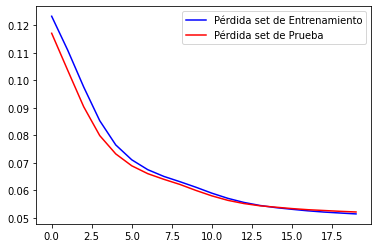

In [ ]:
#Graficamos el margen de error
plt.plot(historia.history["loss"], 'blue', label="Pérdida set de Entrenamiento")
plt.plot(historia.history["val_loss"], 'red', label="Pérdida set de Prueba")
plt.legend()

## Margen de Error

Mediante los valores de loss y val_loss, al ser valores muy similares, nos permite ver que el autoencoder no se esta tendiendo "preferencia", con ninguno de los datos de entrada ni los de validación, esto significa que se esta haciendo una buena minimización del margen de error. En la grafica se pueden ver graficados ambos márgenes de error y como se pude ver, estos se parecen mucho.

## Clasificación

A estas alturas ya tenemos un modelo entrenado, y ahora o que queremos es saber que tan bien esta reconstruyendo los datos normales y los anormales. Entonces aquí lo que vamos a hacer es graficar una idea general de que tan bien se esta realizando la reconstrucción de los datos, porque la idea es que al entrenar el modelo con datos normales, al momento de recibir un dato normal desconocido, este pueda reconstruirlo al 100%, pero si recibe un caso anormal que jamás antes había visto y no ha sido entrenado para reconstruirlo, nos de una deconstrucción mala del dato y de esta forma clasificarlo.

A continuación realizaremos una reconstrucción de un dato normal y anormal y los graficaremos, siendo la línea azul el dato normal o anormal, la línea roja la reconstrucción y el área entre estados dos línea es el margen de error.

Al realizar la reconstrucción normal y anormal, nuestro autoencoder nos devuelve un tensor, el cual pasaremos a un array de numpy para poder manejar los datos.

Reconstruiremos todos los datos normales, y todos los datos anormales correspondientes a la categoría 5, que podría ser cualquiera de las otras, para evaluar que tan bien funciona para el resto de categorías.

En este caso solo graficaremos que pasa con el dato 5 de este set, pero podríamos elegir el dato que queramos dentro del rango de 1 a 140, esto es para tener una idea general del funcionamiento del modelo.

En ambas reconstrucciones se pueden apreciar errores, pero del lado derecho hay errores muy marcados, esto indica que es una reconstrucción de un dato para el cual el modelo no fue entrenado.

Al saber que obtendremos un mayor error en los datos anormales, luego definiremos un criterio para clasificar las distintas patologías de los datos anormales en base al margen de error obtenido. 

Continuara en futuras entregas.

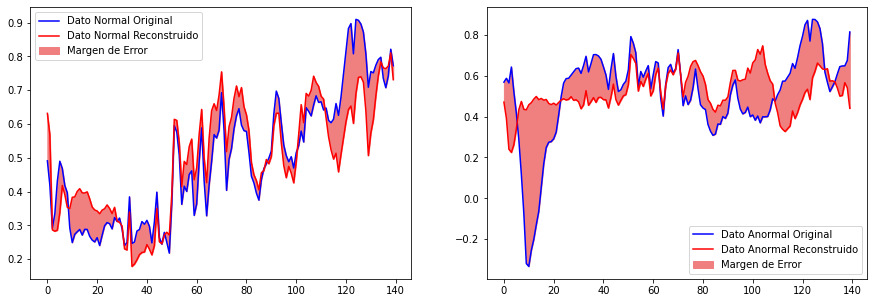

In [ ]:
#Realizamos la recontruccion de un dato normal y normal
rec_normal = autoencoder(prueba_cat_1_normal).numpy()
rec_anormal = autoencoder(prueba_cat_5_normal).numpy()

#Escogemos que dato graficar del 1 al 140
dato = 5

#Establecemos estilos y realizamos las graficas
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(prueba_cat_1_normal[dato],'blue')
plt.plot(rec_normal[dato],'red')
plt.fill_between(np.arange(140), rec_normal[dato], prueba_cat_1_normal[dato], color='lightcoral')
plt.legend(labels=["Dato Normal Original", "Dato Normal Reconstruido", "Margen de Error"])

plt.subplot(1,2,2)
plt.plot(prueba_cat_5_normal[dato],'blue')
plt.plot(rec_anormal[dato],'red')
plt.fill_between(np.arange(140), rec_anormal[dato], prueba_cat_5_normal[dato], color='lightcoral')
plt.legend(labels=["Dato Anormal Original", "Dato Anormal Reconstruido", "Margen de Error"])

## Criterio de Clasificación
Como nombramos anteriormente para clasificar nuestras reconstrucciones de datos utilizaremos el error obtenido en la reconstrucción del mismo, para ello lo que vamos a necesitar es un rango numérico en el que poder considerar el error, por ejemplo, a partir de x valor en adelante corresponde a datos anormales o de pacientes enfermos, y de ese mismo valor hacia atrás, se corresponden a valores normales, considerando que ese valor de error es un valor bajo, al momento de la reconstrucción se obtienen valores de error bajos cuando se reconstruye un dato normal (paciente sano) ya que fue con los datos que se entreno el modelo. Luego se buscara la forma de clasificar los valores de error que se encuentren por encima de ese valor x para poder clasificar los valores anormales con cada una de las categorías nombradas anteriormente (cada categoría corresponde a una patología concreta).

Para tener un criterio mas preciso a la hora de la clasificación debemos observar como se distribuyen los valores de los errores, para ello realizaremos la reconstrucción de un dato en base a los sets de prueba, ya que son los que no "conoce" el autoencoder debido a que no fue entrenado con ellos, sino que fue entrenado con el set de entrenamiento. Lo que haremos será realizar la reconstrucción correspondiente a cada una de las categorías de nuestro set de pruebas utilizando el modulo "predict" y pasando como entrada o parámetro el set de test correspondiente a la categoría a reconstruir, este set debe estar normalizado es decir de 0 (cero) a 1 (uno).

Luego de realizar la reconstrucción para cada una de las categorías, debemos calcular el margen de error para los datos normales y para cada una de las categorías de los datos anormales (2, 3, 4 y 5), para ellos calcular cada uno de esos valores de perdida debemos recordar que la perdida es el error absoluto medio o "median absolute error" (mea), entonces mediante el modulo proporcionado por tensorflow (keras.losses.mae) realizaremos el calculo correspondiente, a ese modulo le debemos pasar como parámetros el valor reconstruido anteriormente y además el set de pruebas normalizado, que seria el valor de referencia (ambos correspondientes a la misma categoría). Esta función nos devolverá para cada uno de nuestros datos el valor de error correspondiente en la reconstrucción .
En la grafica (histograma) que se encuentra debajo se podrá visualizar estas distribuciones.

Para la realización de nuestra grafica de tipo histograma definiremos 100 intervalos (bins), en los cuales matplotlib (librería utilizada para realizar el grafico) se encargara de calcular cuantos datos se encuentran en cada rango.
En el grafico se podrá ver la distribución de los datos en distintos colores, en azul podremos ver la distribución de los datos normales, y en una gama de colores mas cálidos los anormales, pasando por una escala desde amarillo a rojo de acuerdo a su rareza. Se podrán observar 5 colores, cada uno correspondiente a la grafica de su categoría, la clasificación según los colores se podrá observar en la parte superior derecha del grafico general.
Se puede observar que el color azul es el predominante en el grafico ya que es la categoria de la cual tenemos mayor cantidad de datos.

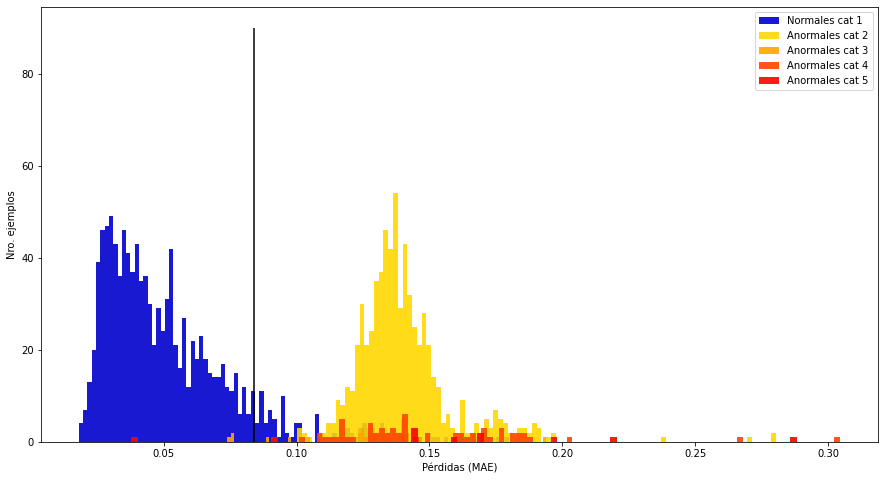

In [ ]:
# Distribucion de errores de construccion por cateogira
import tensorflow as tf

recontruccion_tipo_1 = autoencoder.predict(prueba_cat_1_normal)
recontruccion_tipo_2 = autoencoder.predict(prueba_cat_2_normal)
recontruccion_tipo_3 = autoencoder.predict(prueba_cat_3_normal)
recontruccion_tipo_4 = autoencoder.predict(prueba_cat_4_normal)
recontruccion_tipo_5 = autoencoder.predict(prueba_cat_5_normal)

# perdida =  error absoluto medio (mae en ingles)
perdida_cat1 = tf.keras.losses.mae(recontruccion_tipo_1, prueba_cat_1_normal)
perdida_cat2 = tf.keras.losses.mae(recontruccion_tipo_2, prueba_cat_2_normal)
perdida_cat3 = tf.keras.losses.mae(recontruccion_tipo_3, prueba_cat_3_normal)
perdida_cat4 = tf.keras.losses.mae(recontruccion_tipo_4, prueba_cat_4_normal)
perdida_cat5 = tf.keras.losses.mae(recontruccion_tipo_5, prueba_cat_5_normal)

# Graficamos

plt.figure(figsize=(15,8))
plt.hist(perdida_cat1[None,:], bins=100, alpha=0.9, color='#0000CD', label='Normales cat 1')
plt.hist(perdida_cat2[None,:], bins=100, alpha=0.9, color='#FFD700', label='Anormales cat 2')
plt.hist(perdida_cat3[None,:], bins=100, alpha=0.9, color='#FFA500', label='Anormales cat 3')
plt.hist(perdida_cat4[None,:], bins=100, alpha=0.9, color='#FF4500', label='Anormales cat 4')
plt.hist(perdida_cat5[None,:], bins=100, alpha=0.9, color='#FF0000', label='Anormales cat 5')

# Ejes
plt.xlabel('Pérdidas (MAE)')
plt.ylabel('Nro. ejemplos')

# Referencias
plt.legend(loc='upper right')

# Representacion dedl umbral
plt.vlines(0.084, 0, 90, 'black')

### Lectura del grafico

En el eje horizontal de nuestro grafico, corresponde al rango de valores correspondiente a la perdida (error) que estamos calculando de nuestro valor de entrada y su reconstrucción. Podemos ver que el error de nuestra grafica azul va desde 0.02 aproximadamente, hasta 0.11 aproximadamente, ese es el rango en el cual se encuentran todos nuestros errores correspondientes a la categoría 1 (datos normales), a su vez en el eje vertical se puede visualizar la cantidad de cuantos errores corresponden a ese rango, podemos ver que el primer rango hay aproximadamente 15 valores que corresponden a el y así sucesivamente (cada rango es una porción de la grafica).
Ahora, al momento de visualizar los datos anormales, pintados en colores cálidos, podemos ver que en su gran mayoría (salvo pequeñas excepciones), se encuentras distribuidos a la derecha del eje horizontal, esto significa que esos datos que se encuentren mas a la derecha, les corresponde un margen de error mayor. En el grafico, al rededor del valor 0.10, podemos encontrar un "valle", que es donde podríamos establecer nuestro umbral de separación, por ende podemos decir que lo que este de ese valor (0.10) hacia la derecha corresponde a un dato anormal (paciente enfermo) y lo que se encuentre de este valor (0.10) a la izquierda, corresponde a un dato normal (paciente sano), esto nos brinda un criterio bastante preciso para poder clasificar nuestros datos.

## Umbral de Separación
Para calcular nuestro umbral de separación utilizaremos el valor del promedio de nuestros datos de perdida de la categoría 1 (grafica de color azul), que mediante la observación podemos decir que se encuentra cerda ce 0.05,  y además le agregaremos una desviación estándar, que es una medida de la dispersión de los datos, cuanto mayor sea la dispersión mayor es la desviación, si no hubiera ninguna variación en los datos, es decir, si fueran todos iguales, la desviación sería cero. Con el calculo de la desviación estándar podemos considerar que aproximadamente entre un 60% y un 65% de los datos normales se encontraran dentro de ese rango, pero nos encontramos con un obstáculo que inevitablemente tendremos, nunca podremos tener una separación perfecta, no existe una separación perfecta en la practica, siempre se nos pasaran datos fuera del rango controlado ya sea de un lado o del otro, aunque establezcamos nuestro umbral en el valor 0.10 siempre habrán datos de un lado y del otro que no corresponden.

El umbral se encuentra graficado mediante una linea vertical de color negro hasta el valor vertical 90, proporcionando una separación grafica de nuestros datos.



In [ ]:
# Calculamos el umbral de separacion
media_cat1 = np.mean(perdida_cat1)
desviacion_estandar = np.std(perdida_cat1)
umbral_sep = media_cat1 + desviacion_estandar
print("Desviacion Estandar: ", desviacion_estandar)
print("Promedio de nuestros datos de perdida de la Categoria 1: ", media_cat1)
print("Umbral de Separacion: ", umbral_sep)

NameError: ignored

### Futuras Entregas
El ultimo paso que nos falta para poder realizar la clasificación correspondiente es realizar el código que tomará el dato, calculará su error y definirá si el error esta por encima o por debajo del umbral y así determinar si el dato es normal o anormal, esta sección se realizara para la próxima entrega, completando al clasificación de las patologías y dejando para la entrega final una optimización del modelo, con mejoras en su capacidad predictiva y posibles reducciones en los valores de error obtenidos siendo este mas preciso, además de realizar una conclusión final del proyecto en si mismo.